In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
from keras.datasets import mnist, fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

### Data Exploration

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

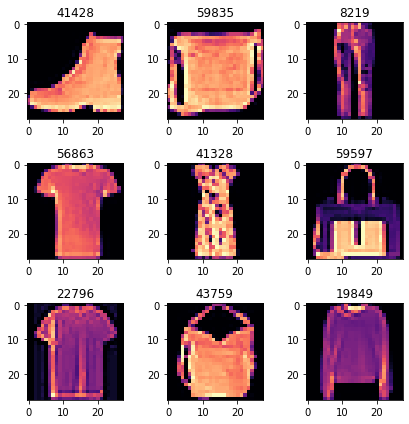

In [4]:
#plot random images
figure, axes = plt.subplots(3,3,figsize=(6,6))
axes = axes.reshape(9)
for i,index in enumerate(np.random.randint(0,59999,9)):
    axes[i].imshow(x_train[index], cmap=plt.cm.magma)
    axes[i].set_title(str(index))
    plt.tight_layout()

In [5]:
x_train_float = x_train.astype('float32')
x_test_float = x_test.astype('float32')

x_train_float /= 255
x_test_float /= 255

x_train_final = x_train_float.reshape(x_train_float.shape[0], 28, 28, 1)
x_test_final = x_test_float.reshape(x_test_float.shape[0], 28, 28, 1)

In [6]:
categories = {0: 'T-shirt/top',
             1: 'Trouser',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandal',
             6: 'Shirt',
             7: 'Sneaker',
             8: 'Bag',
             9: 'Boot'}

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [29]:
x_train_sample = x_train_final[0:6000]
y_train_sample = y_train_cat[0:6000]

x_test_sample = x_test_final[0:6000]
y_test_sample = y_test_cat[0:6000]

In [109]:
model = Sequential([Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train_sample.shape[1:]),
                   Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
                   MaxPool2D(pool_size=(2, 2)),
                   Dropout(rate=0.25),
                   Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                   MaxPool2D(pool_size=(2, 2)),
                   Dropout(rate=0.25),
                   Flatten(),
                   Dense(256, activation='relu'),
                   Dropout(rate=0.5),
                   Dense(10, activation='softmax')])

model.summary() 

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

results = model.fit(x_train_sample, y_train_sample, batch_size=100, epochs=5, verbose=2, validation_split=0.2)

# datagen = ImageDataGenerator(rotation_range=10,
#                             zoom_range=0.1,
#                             width_shift_range=0.1,
#                             height_shift_range=0.1)

# epochs = 3
# batch_size = 100
# history = model.fit_generator(datagen.flow(x_train_sample, y_train_sample, batch_size=batch_size), epochs=epochs,
#                              validation_data=(x_test_sample, y_test_sample), steps_per_epoch=x_train_sample.shape[0//batch_size])


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 3, 3, 64)        

In [110]:
metrics = pd.DataFrame(results.history)
metrics

,val_loss,val_accuracy,loss,accuracy
0,0.924163,0.657500,1.594179,0.415000
1,0.728969,0.731667,0.883497,0.677708
2,0.667625,0.746667,0.745165,0.729167
3,0.622324,0.764167,0.674574,0.754792
4,0.605456,0.768333,0.638181,0.764583


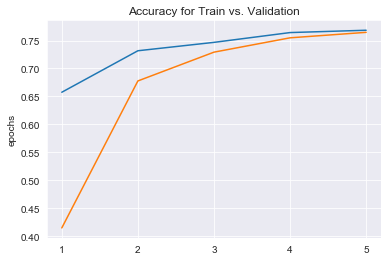

In [112]:
sns.lineplot([1,2,3,4,5],y=metrics['val_accuracy'])
sns.lineplot([1,2,3,4,5],y=metrics['accuracy'])
plt.xticks([1,2,3,4,5])
plt.title('Accuracy for Train vs. Validation')
label=plt.ylabel('epochs')

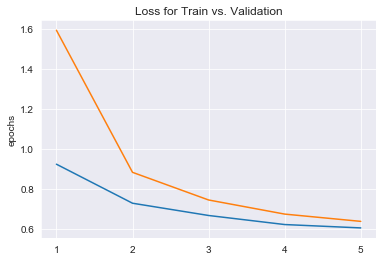

In [113]:
sns.lineplot([1,2,3,4,5],y=metrics['val_loss'])
sns.lineplot([1,2,3,4,5],y=metrics['loss'])
plt.xticks([1,2,3,4,5])
plt.title('Loss for Train vs. Validation')
label=plt.ylabel('epochs')

In [114]:
predictions = new_model.predict(x_test_sample)
predictions

array([[3.7964614e-04, 1.5877730e-04, 1.3343486e-04, ..., 2.3505734e-01,
        1.2516411e-03, 7.2888762e-01],
       [2.6204498e-03, 1.4875554e-06, 8.5809344e-01, ..., 4.6381157e-07,
        7.6510239e-04, 2.1321512e-07],
       [1.1469631e-05, 9.9995995e-01, 2.2152190e-07, ..., 1.2566921e-08,
        1.2788966e-07, 9.7484087e-10],
       ...,
       [1.6177210e-04, 5.1012680e-06, 2.2539888e-04, ..., 3.3214189e-02,
        1.6842209e-02, 1.0854376e-05],
       [5.2667700e-02, 1.6451975e-02, 1.0233073e-01, ..., 8.9380529e-04,
        2.2482052e-03, 7.6246477e-04],
       [8.6066848e-01, 7.8773528e-04, 1.3809161e-02, ..., 9.3774943e-05,
        9.5423881e-04, 2.6522591e-04]], dtype=float32)

In [115]:
counts=Counter()
for x,y in zip(predictions, y_test):
    if np.argmax(x)==y:
        counts[y] +=1
        
counts

Counter({9: 554,
         2: 425,
         1: 540,
         5: 543,
         7: 499,
         3: 487,
         4: 438,
         8: 546,
         0: 472,
         6: 51})

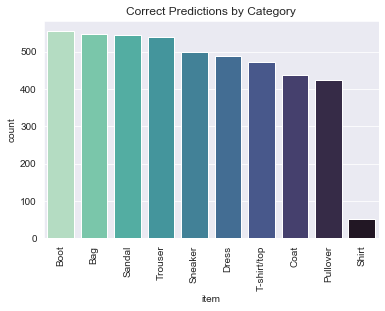

In [135]:
predicted = pd.DataFrame.from_dict(counts, orient='index').reset_index().rename(columns={'index':'label', 0:'count'})
predicted['item'] = predicted['label'].map(categories)
predicted = predicted.sort_values('count', ascending=False)
sns.barplot(predicted['item'], predicted['count'], palette='mako_r')
plt.title('Correct Predictions by Category')
ticks=plt.xticks(rotation='vertical')

In [130]:
#save and load a model
model.save('mnist_fashion.model')
new_model = tf.keras.models.load_model('mnist_fashion.model')

In [38]:
# model = Sequential([
#     Dense(16, input_shape=x_train_sample.shape[1:]),
#     Dense(32, activation='relu'),
#     Dense(10, activation='softmax', input_shape=x_train_sample.shape[1:]),
# ])

# model.summary()

# model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(x_train_sample, y_train_sample, batch_size=100, epochs=3, verbose=2)